In [1]:
%matplotlib inline
import pandas as pd

inSrs_dir='/cellar/users/btsui/Data/nrnb01_nobackup/METAMAP/allSRS.pickle'

%time srsS=pd.read_pickle(inSrs_dir)

In [203]:
l1_srs=srsS.index.get_level_values(1).str.replace(' ','_')

srsS=pd.Series(data=srsS.values,
          index=pd.MultiIndex.from_arrays([srsS.index.get_level_values(0),
                                          l1_srs]))

In [25]:
sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'


technical_meta_data_df=pd.read_pickle(sra_dump_pickle_dir)



In [147]:
attribVC=l1_srs.value_counts()

In [148]:
#attribVC.loc['analyte type']

In [149]:
attribVC.index=attribVC.index.str.lower()

In [150]:
attribVC=attribVC.groupby(attribVC.index).sum()

In [151]:
NCBI_harmonized_name_df=pd.read_csv('./Data/NCBI_harmonized_name_df.tsv',sep='\t')

In [152]:
format_ms=NCBI_harmonized_name_df['Format'].str.contains('{text}').fillna(False)

In [153]:
NCBI_harmonized_name_df['Harmonized name']=NCBI_harmonized_name_df['Harmonized name'].str.lower()
#[NCBI_harmonized_name_df['Format'].str.contains('term|text').fillna(False)]

In [154]:
#NCBI_harmonized_name_df['n_srs']=0

NCBI_harmonized_name_df['n_srs']=attribVC.loc[NCBI_harmonized_name_df['Harmonized name']].values



/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
NCBI_harmonized_name_df['Harmonized name'].str.contains(' ')

In [157]:
#NCBI_harmonized_name_df

In [204]:
srsS_sub=srsS[l1_srs.isin(NCBI_harmonized_name_df['Harmonized name'])
                        ]

In [217]:
wordCountS=srsS_sub.str.count(' ')+1
attribWordCountS=wordCountS.groupby(level=1).median()

In [218]:
headS=srsS_sub.sample(n=100000).groupby(level=1).head(n=100)

headS=headS.reorder_levels([1,0]).sort_index()

In [219]:
#headS

In [221]:
#headS.loc['analyte_type'].unique()

In [202]:
#nunique_per_attribS[nunique_per_attribS.index.str.contains('analyte')]

In [205]:
%time nunique_per_attribS=srsS_sub.groupby(level=1).nunique()

CPU times: user 37.1 s, sys: 1.24 s, total: 38.3 s
Wall time: 35.3 s


In [207]:
#NCBI_harmonized_name_df.sort_values('n_srs',ascending=False)

NCBI_harmonized_name_df['n_unique']=nunique_per_attribS.loc[NCBI_harmonized_name_df['Harmonized name']].values


/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
NCBI_harmonized_name_df['word_count_median']=attribWordCountS.loc[NCBI_harmonized_name_df['Harmonized name']].values

/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [209]:
harmonizedDf=NCBI_harmonized_name_df.sort_values('n_unique',ascending=False)

In [210]:
#harmonizedDf[harmonizedDf['n_unique']>=1000]

In [211]:
pd.set_option('display.max_rows', 1000)

In [212]:
#NCBI_harmonized_name_df

In [213]:
harmonizedDf.to_csv('./Results/harmonizedDf_with_count.tsv',sep='\t')

In [195]:
#(harmonizedDf['n_unique']>1000).sum()

In [196]:
#harmonizedDf[~harmonizedDf['Harmonized name'].str.contains('id$')]

In [174]:
#!echo $PWD/./Results/harmonizedDf_with_count.tsv

Text(0,0.5,'# of unique text')

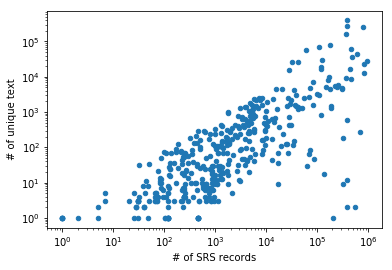

In [175]:
ax=NCBI_harmonized_name_df.plot(kind='scatter',x='n_srs',y='n_unique')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('# of SRS records')
ax.set_ylabel('# of unique text')

In [176]:
import seaborn as sns

/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


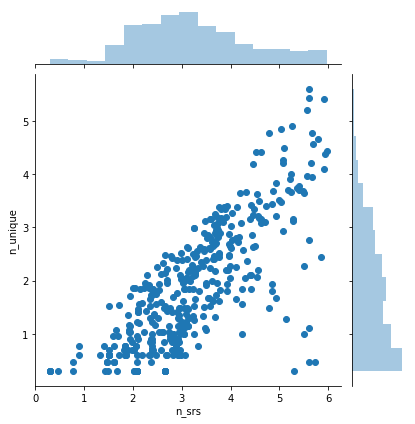

In [177]:
import numpy as np
logDf=np.log10(NCBI_harmonized_name_df[['n_srs','n_unique']]+1).dropna()
sns.jointplot(data=logDf,
             x='n_srs',y='n_unique')#.corr()


In [49]:
from scipy import stats

In [51]:
stats.linregress(x=logDf['n_srs'],y=logDf['n_unique'])

LinregressResult(slope=0.8183651156382828, intercept=-0.6842403207456893, rvalue=0.8258313464198588, pvalue=1.5147251219582971e-105, stderr=0.027398349814692916)

In [52]:
!wget ftp://ftp.ncbi.nlm.nih.gov/pub/lsmith/MedTag/medtag.tar.gz

--2018-07-02 15:09:29--  ftp://ftp.ncbi.nlm.nih.gov/pub/lsmith/MedTag/medtag.tar.gz
           => 'medtag.tar.gz'
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 2607:f220:41e:250::13
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lsmith/MedTag ... done.
==> SIZE medtag.tar.gz ... 14761663
==> PASV ... done.    ==> RETR medtag.tar.gz ... done.
Length: 14761663 (14M) (unauthoritative)

medtag.tar.gz       100%[===================>]  14.08M  18.9MB/s    in 0.7s    

2018-07-02 15:09:30 (18.9 MB/s) - 'medtag.tar.gz' saved [14761663]



In [53]:
!mv medtag.tar.gz ./Data/.

In [55]:
%%bash
cd ./Data/
tar -xvf medtag.tar.gz

medtag/
medtag/README
medtag/medpost/
medtag/medpost/medpost.db
medtag/medpost/medpost.sql
medtag/medpost/tag_cl.ioc
medtag/medpost/tag_mb.ioc
medtag/medpost/tag_mb01.ioc
medtag/medpost/tag_mb02.ioc
medtag/medpost/tag_mb03.ioc
medtag/medpost/tag_mb04.ioc
medtag/medpost/tag_mb05.ioc
medtag/medpost/tag_mb06.ioc
medtag/medpost/tag_mb07.ioc
medtag/medpost/tag_mb08.ioc
medtag/medpost/tag_mb09.ioc
medtag/medpost/tag_mb10.ioc
medtag/medpost/tag_ml01.ioc
medtag/http/
medtag/http/medtag.html
medtag/http/footer.html
medtag/http/cgi-lib.perl
medtag/http/db-lib.perl
medtag/http/delete_list.cgi
medtag/http/delete_phrase.cgi
medtag/http/edit_phrase.cgi
medtag/http/edit_token.cgi
medtag/http/insert_list.cgi
medtag/http/insert_phrase.cgi
medtag/http/list.cgi
medtag/http/print_token.cgi
medtag/http/search.cgi
medtag/http/sum_corps.cgi
medtag/http/sum_lists.cgi
medtag/http/update_token.cgi
medtag/http/getSelected.js
medtag/http/tables.sql
medtag/http/db_to_sql.perl
medtag/genetag/
medtag/genetag/genetag

In [57]:
!head ./Data/medtag/medpost/tag_ml01.ioc


P00006620A05
Todarodes_NN pacificus_NN contains_VVZ much_RR more_DD retinochrome_NN than_CSN Loligo_NN ,_, and_CC it_PN is_VBZ more_RR abundant_JJ in_II the_DD outer_JJ than_CSN in_II the_DD inner_JJ segments_NNS ._.
P00013085A09
Demethylglycodiazin_NN (_( 2-benzolsulfonamid_NN --_: 5-_MC (_( beta-hydroxyethoxy_NN )_) -pyrimidin_NN )_) ,_, which_PNR did_VDD not_RR inhibit_VVB endogenous_JJ ketogenesis_NN in_II isolated_VVNJ liver_NN cells_NNS ,_, did_VDD not_RR affect_VVB lysosomal_JJ lipase_NN activity_NN ._.
P00026908A02
If_CS the_DD theory_NN is_VBZ correct_JJ ,_, it_PN suggests_VVZ that_CST both_CC prophylaxis_NN and_CC management_NN of_II the_DD acute_JJ condition_NN should_VM be_VBB possible_JJ by_II means_NNS of_II selective_JJ alpha-adrenoceptor_NN antagonism_NN ._.
P00042211A05
However_RR ,_, in_II undifferentiated_VVNJ areas_NNS of_II transplanted_VVNJ tissue_NN ,_, we_PN found_VVD ultrastructural_JJ evidence_NN that_CST immature_JJ pericytes_NNS of_II capillaries_NNS can_VM 